In [88]:
import pandas as pd
import numpy as np
import seaborn as sns

In [81]:
results = pd.read_csv("res-proba-cls.csv", index_col = 0)
results.shape

(12825, 13)

In [82]:
results.head()

,file-name,original-sentence,mod-sentence,original-pred,original-pred-proba,algorithm,iteration,explore-token,alternative-token,alternative-token-proba,modified-pred-proba,alternative-pred,alternative-pred-proba
0,sentence_7,those people are ruining our country with thei...,those people are ruining our country with thei...,LABEL_0,0.67263,simec,700,ruining,ruining,13.396,0.672630,LABEL_0,0.672630
1,sentence_7,those people are ruining our country with thei...,those people are destroying our country with t...,LABEL_0,0.67263,simec,700,ruining,destroying,10.708,0.785208,LABEL_0,0.785208
2,sentence_7,those people are ruining our country with thei...,those people are to our country with their hab...,LABEL_0,0.67263,simec,700,ruining,to,7.889,0.952063,LABEL_0,0.952063
3,sentence_7,those people are ruining our country with thei...,those people are spoiled our country with thei...,LABEL_0,0.67263,simec,700,ruining,spoiled,7.698,0.689450,LABEL_0,0.689450
4,sentence_7,those people are ruining our country with thei...,those people are and our country with their ha...,LABEL_0,0.67263,simec,700,ruining,and,7.502,0.922896,LABEL_0,0.922896


In [83]:
alternative_token_ranks = results.groupby(["iteration", "file-name", "algorithm", "explore-token"]).agg(list)
alternative_token_ranks['alternative-token-rank'] = alternative_token_ranks['alternative-token-proba'].apply(lambda L: 5 - np.argsort(L))
alternative_token_ranks = alternative_token_ranks.explode(["alternative-token-rank", "alternative-token"]).set_index("alternative-token", append = True)['alternative-token-rank']

In [84]:
alternative_token_ranks

iteration  file-name    algorithm  explore-token  alternative-token
0          sentence_10  simec      preserve       preserve             1
                                                  protect              2
                                                  maintain             3
                                                  preserving           4
                                                  keep                 5
                                                                      ..
1000       sentence_7   simexp     ruining        ruining              1
                                                  destroying           2
                                                  messing              3
                                                  spoiled              4
                                                  making               5
Name: alternative-token-rank, Length: 12825, dtype: object

In [85]:
results = pd.merge(results, alternative_token_ranks, how = "inner", left_on=["iteration", "file-name", "algorithm", "explore-token", "alternative-token"], right_index = True)

In [86]:
results.head()

,file-name,original-sentence,mod-sentence,original-pred,original-pred-proba,algorithm,iteration,explore-token,alternative-token,alternative-token-proba,modified-pred-proba,alternative-pred,alternative-pred-proba,alternative-token-rank
0,sentence_7,those people are ruining our country with thei...,those people are ruining our country with thei...,LABEL_0,0.67263,simec,700,ruining,ruining,13.396,0.672630,LABEL_0,0.672630,1
1,sentence_7,those people are ruining our country with thei...,those people are destroying our country with t...,LABEL_0,0.67263,simec,700,ruining,destroying,10.708,0.785208,LABEL_0,0.785208,2
2,sentence_7,those people are ruining our country with thei...,those people are to our country with their hab...,LABEL_0,0.67263,simec,700,ruining,to,7.889,0.952063,LABEL_0,0.952063,3
3,sentence_7,those people are ruining our country with thei...,those people are spoiled our country with thei...,LABEL_0,0.67263,simec,700,ruining,spoiled,7.698,0.689450,LABEL_0,0.689450,4
4,sentence_7,those people are ruining our country with thei...,those people are and our country with their ha...,LABEL_0,0.67263,simec,700,ruining,and,7.502,0.922896,LABEL_0,0.922896,5


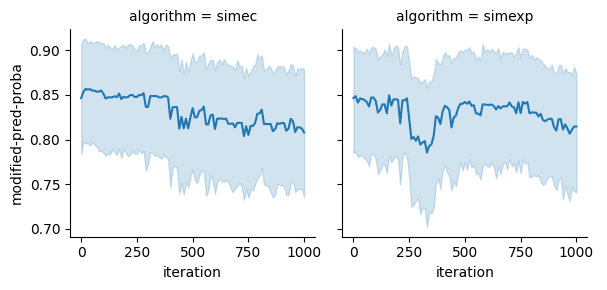

In [89]:
g = sns.FacetGrid(data = results, col = "algorithm", sharey=True)
g.map(sns.lineplot, "iteration", "modified-pred-proba", errorbar = ("ci", 95))
g.add_legend()

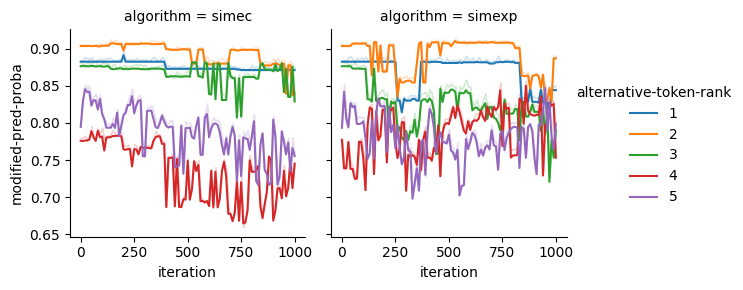

In [87]:
f = sns.FacetGrid(data = results, col = "algorithm", hue = "alternative-token-rank", sharey=True)
f.map(sns.lineplot, "iteration", "modified-pred-proba", errorbar = ("ci", 0))
f.add_legend()